# todo

- does it actually run? compare result
- write a read function!
- transfere classes and functions to module.
- make it run for an arbitrary date in 2012 for the SGP site
- can we automatically download met files
- run it with the other met files ... what is different?
- write a save to and read from net_cdf routine
- write a routine to classify origin
- how can we get a most likely origin? wouldnt we at least say, it cant be older then xy days  according to the conditions along the trajectory?
- how to handle time series of trajectories ... since that is what i want
- write a parameter class similar to the one used in sbdart so default values and info file can easiely be seen
- add units to settings and parameter class
- the sampling_interval (concentration grid) could be set equal to general sampling_time, and one is changed the other one should change too
- save entire Run, I suggest to make all parameters of type Parameter first, including pollutants and grids!!

# Hysplit

## Installing HYSPLIT

### OS X

last update (last update: 2017 )

The documentation of how to install HYSPLIT is really not that great. Anyway, do this:
- download the .dmg
- copy the Hysplit folder into your home directory


General notice (not needed to run pySplit):
- the general idea seams to be to run every script from the working folder. However, none of the scrips where in that folder and I had to link them into the folder, e.g. to get the gui running you first need to execute the following line from within the working directory: ln -s ../guicode/hysplit4.tcl hysplit4.tcl     then you can start the gui from within the working directory by executing ./hysplit4.tcl

### Linux/ubuntu

download from here: https://www.ready.noaa.gov/hyreg/HYSPLIT_linux.php

Confusingly, there is no installation required, the code can be used as is. The only thing that needs to be done is to copy relevant executables into the working directory

https://ready.arl.noaa.gov/documents/Tutorial/html/install_unix.html

## make a test run

In case you want to double check if you get the same result as pySplit
- select Trajectory
- select setup Run
- settings are pretty self explanatory
- make sure to add the adequate meteorologic files
- save

to run the model:
- select Trajectory (in the main window)
- select run model

to visualize:
- select Trajectory (in the main window)
- select Display
- select Trajectory
- hit Execute (default values will give you something)

# hysplit-py

In [1]:
import hysplit_py

In [3]:
%matplotlib inline

plt.rcParams['figure.dpi'] = 200

## parallizing

todo:
- one last thing that could potentially be checked is to have multiple separate installations... the errormessage is that it can't find some file which is probably a temporary file that gets deleted by one instance at the end of processing. When the second instance is trying to delete that file it no longer exists -> error
- is it possible to run hysplit twice? -> no! There is possibility to run hysplit in parallel ... no time to check that out right now
- make sure everyone gets it's own control file ... arbitrary?
- same for the output files ... how many are there? cdump ... and the 

## concentration mode

### set it up

In [29]:
run = hysplit_py.Run('concentration')

In [30]:
run.settings.path2executable = '/mnt/telg/tmp/hysplit_ubuntu/exec/hycs_std'

run.settings.path2working_directory = '/mnt/telg/tmp/hysplit_ubuntu/working/'

hysplit_py.split_lab.settings['control.input_met_data_folder']['value']  = '/mnt/data/data/hysplit_met_files/'

#### parameters

In [33]:
run.parameters

concentration_grids     :  no grids defined

input_met_data_folder   :  /mnt/data/data/hysplit_met_files/
input_met_file_names    :  ['gdas1.jan12.w1']
meterologic_data_format :  gdas1
num_starting_loc        :  1
number_of_samples       :  2500
output_path             :  ./cdump
pollutants              :  
no pollutants defined

run_time                :  6
start_time              :  2012-01-01 00:00:00
starting_loc            :  [[36.605, -97.485, 10.0]]
top_of_model_domain     :  10000.0
vertical_motion_option  :  0

#### select a predefined scene

In [34]:
run.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run.parameters

concentration_grids     :  
default
--------
center                                       :  [36.605, -97.485]
output_path                                  :  ./cdump
sampling_interval                            :  [0, 12, 0]
sampling_start_time                          :  2012-01-01 00:00:00
sampling_stop_time                           :  2011-12-31 12:00:00
spacing                                      :  [0.05, 0.05]
span                                         :  [60.0, 120.0]
vertical_concentration_levels_height_of_each :  100
vertical_concentration_levels_number         :  1

input_met_data_folder   :  /mnt/data/data/hysplit_met_files/
input_met_file_names    :  ['gdas1.jan12.w1', 'gdas1.dec11.w5']
meterologic_data_format :  gdas1
num_starting_loc        :  1
number_of_samples       :  2500
output_path             :  ./cdump
pollutants              :  
default
----------
deposition_diffusivity_ratio          :  0.0
deposition_effective_henrys_constant  :  0.0
deposition_particle_d

#### change individual parameter

In [35]:
run.parameters.run_time = 6

#### download meteoroligic data

In [36]:
run.download_missing_meterologic_files()

### Run it

In [37]:
run.run_test()

Test result: True
All met files present: True
Met files available:
/mnt/data/data/hysplit_met_files/gdas1/gdas1.jan12.w1 ..... True


(True,
 'Test result: True\nAll met files present: True\nMet files available:\n/mnt/data/data/hysplit_met_files/gdas1/gdas1.jan12.w1 ..... True',
 [])

In [39]:
run.run()

In [38]:
run.run()

FileNotFoundError: [Errno 2] No such file or directory: './con2asc': './con2asc'

### the result

#### plot it

/mnt/telg/programs/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:1673: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


[<Figure size 432x288 with 2 Axes>,

/mnt/telg/programs/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


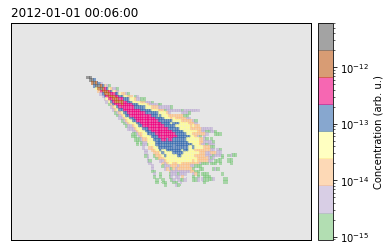

In [40]:
run.result.plot()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


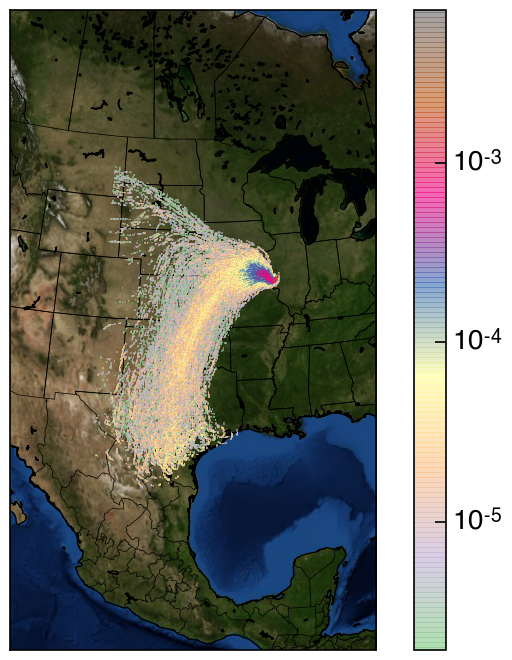

In [839]:
run.result.plot(resolution='i', back_ground='bluemarble')#(vmin = 1e-16,vmax = 1e-11)

#### source attribution

##### angular

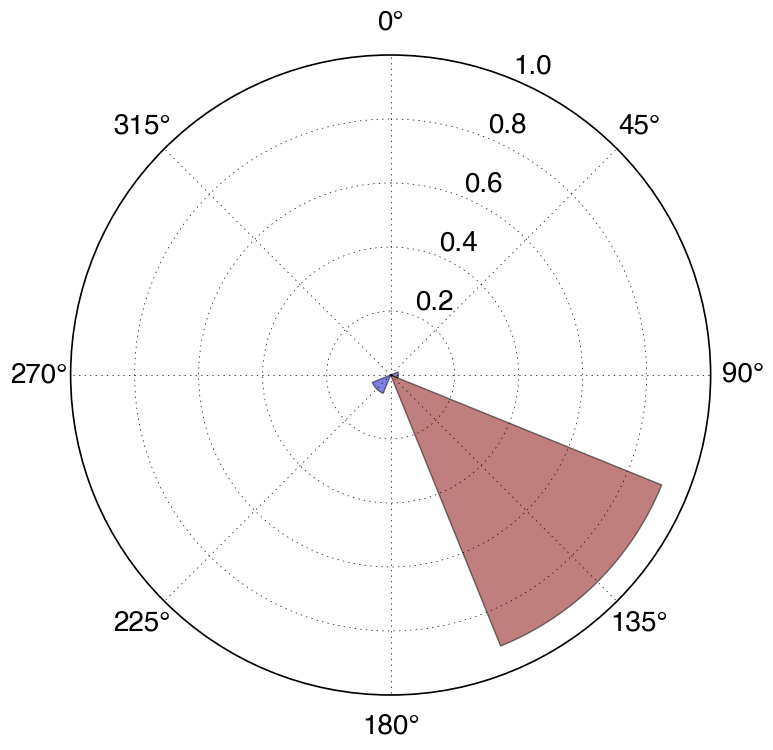

In [255]:
run.result.source_attribution_angular().plot()

##### land use

In [23]:
from hysplit_py import land_use_map as lum

In [61]:
fname = '/Volumes/HTelg_4TB_Backup/land_use_data/LCType_0p25.nc'
land_use = lum.read_file(fname)

(<matplotlib.figure.Figure at 0x11de55208>,
 <matplotlib.collections.QuadMesh at 0x119741c18>)

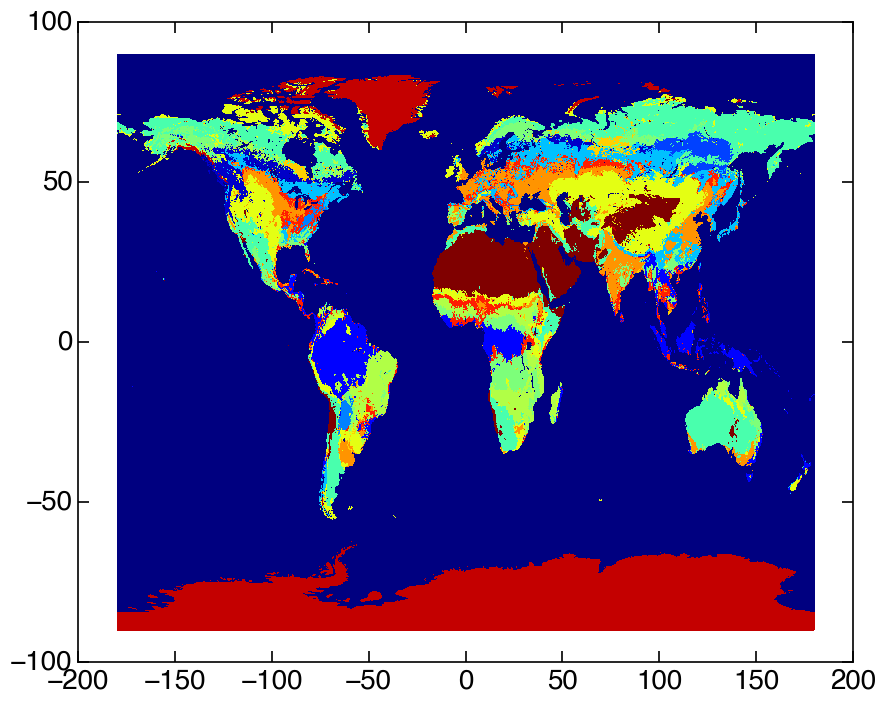

In [25]:
land_use.plot()

In [298]:
fname = '/Users/htelg/data/hysplit_product_data/SGP/source_attribution_angular/20120101_000000'
res = hysplit_py.load_result_netCDF(fname)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


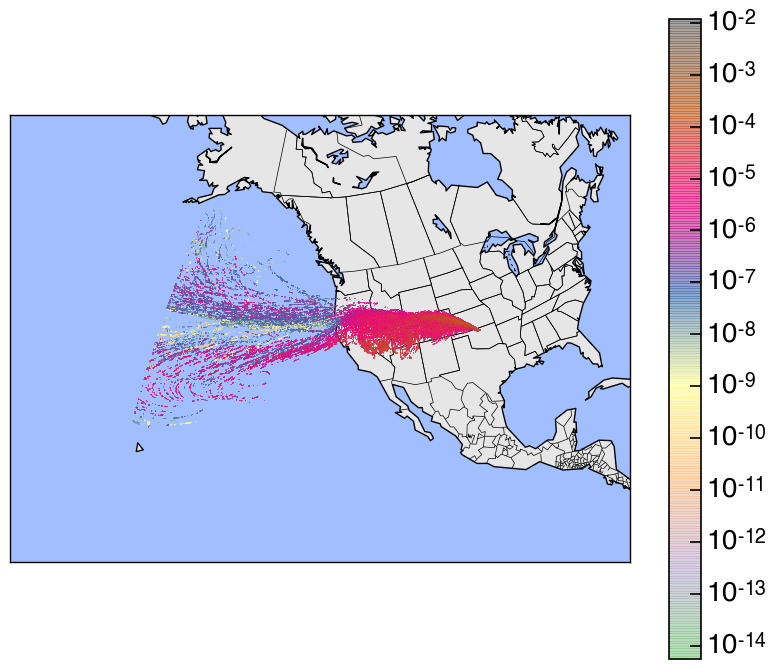

In [299]:
res.plot()

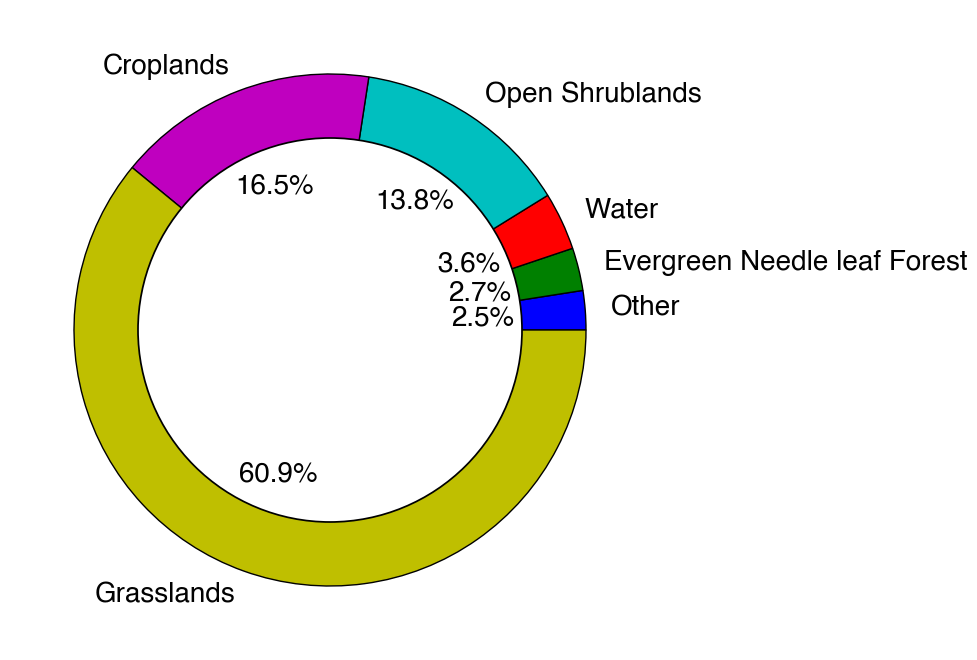

In [304]:
res.source_attribution_land_use.land_use_map = land_use
res.source_attribution_land_use.plot()

#### save/load result

In [250]:
fname = '/Users/htelg/tmp/tmp.nc'

In [251]:
run.result.save_netCDF(fname)

In [252]:
res = hysplit_py.load_result_netCDF(fname)

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


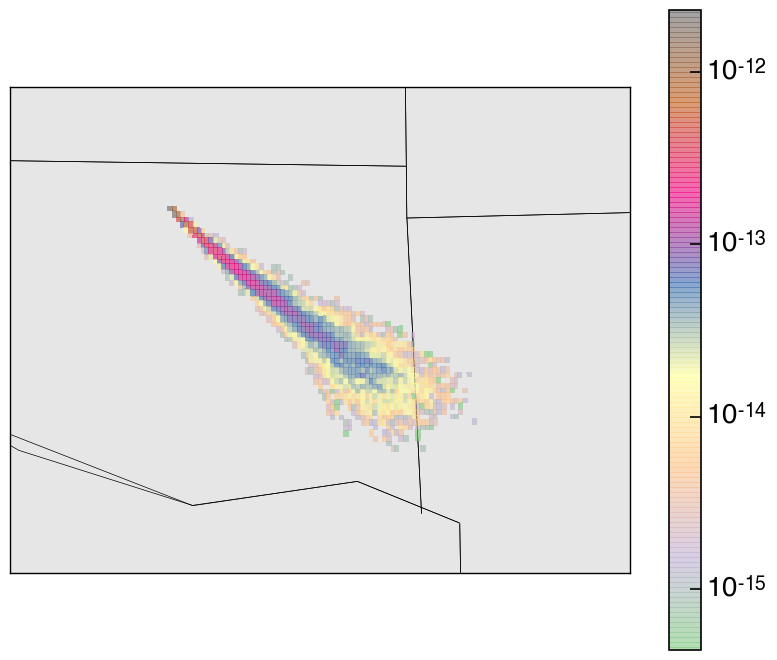

In [253]:
res.plot()

## trajectory mode

This mode has not seen much attenchen lately ... hope it still works

In [1002]:
reload(hysplit_py)
reload(split_lab)

<module 'hysplit_py.split_lab' from '/Users/htelg/prog/hysplit-py/hysplit_py/split_lab.py'>

In [3]:
bla = hysplit_py.Run('trajectory')
bla.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


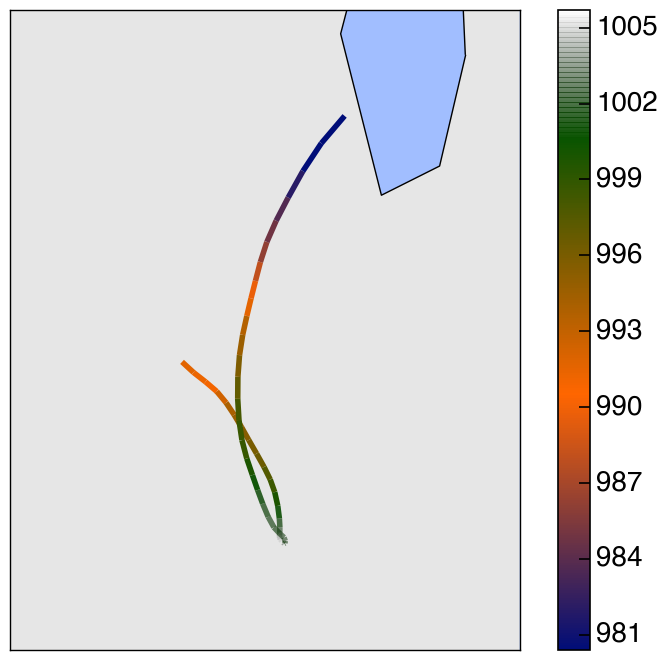

In [6]:
lc = bla.result.plot_on_map(intensity='PRESSURE', lw = 4)

## trajectory mode (Baustelle)

This mode has not seen much attenchen lately ... hope it still works

In [10]:
path2executable = '/mnt/telg/programs/hysplit/exec/hycs_std'
path2working_directory = '/mnt/telg/programs/hysplit/working/'
path2metfiles = '/mnt/data/data/hysplit_met_files/'

In [115]:
reload(hysplit_py)
reload(hysplit_py.split_lab)

<module 'hysplit_py.split_lab' from '/mnt/telg/prog/hysplit-py/hysplit_py/split_lab.py'>

In [116]:
hysplit_py.split_lab.settings['control.input_met_data_folder']['value']  = path2metfiles


In [117]:
bla = hysplit_py.Run('trajectory')
# bla.settings.path2executable = path2executable
# bla.settings.path2working_directory = path2working_directory

In [123]:
bla.parameters.meterologic_data_format = 'gdas0p5'
bla.parameters.run_time = -5 * 24

In [124]:
bla.run_test()

Test result: False
All met files present: False
Met files available:
/mnt/data/data/hysplit_met_files/gdas0p5/20100101_gdas0p5 ..... True
/mnt/data/data/hysplit_met_files/gdas0p5/20091231_gdas0p5 ..... True
/mnt/data/data/hysplit_met_files/gdas0p5/20091230_gdas0p5 ..... False
/mnt/data/data/hysplit_met_files/gdas0p5/20091229_gdas0p5 ..... False
/mnt/data/data/hysplit_met_files/gdas0p5/20091228_gdas0p5 ..... False
/mnt/data/data/hysplit_met_files/gdas0p5/20091227_gdas0p5 ..... False


(False,
 'Test result: False\nAll met files present: False\nMet files available:\n/mnt/data/data/hysplit_met_files/gdas0p5/20100101_gdas0p5 ..... True\n/mnt/data/data/hysplit_met_files/gdas0p5/20091231_gdas0p5 ..... True\n/mnt/data/data/hysplit_met_files/gdas0p5/20091230_gdas0p5 ..... False\n/mnt/data/data/hysplit_met_files/gdas0p5/20091229_gdas0p5 ..... False\n/mnt/data/data/hysplit_met_files/gdas0p5/20091228_gdas0p5 ..... False\n/mnt/data/data/hysplit_met_files/gdas0p5/20091227_gdas0p5 ..... False',
 ['20091230_gdas0p5',
  '20091229_gdas0p5',
  '20091228_gdas0p5',
  '20091227_gdas0p5'])

In [125]:
bla.download_missing_meterologic_files()

In [126]:
# %%debug -b /mnt/telg/prog/hysplit-py/hysplit_py/split_lab.py:2641
bla.run()

/mnt/telg/programs/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


time


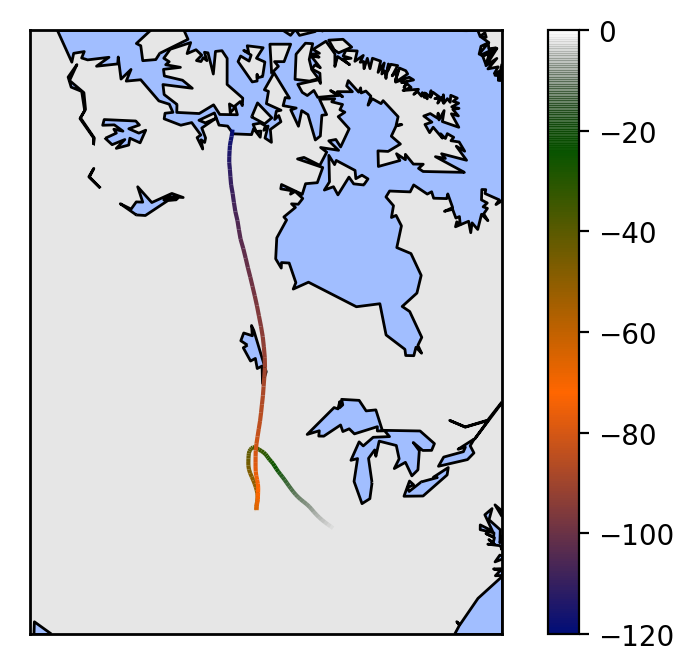

In [127]:
bla.result.plot_on_map()

In [90]:
hysplit_py.split_lab.read_hysplit_traj_output_file('/mnt/telg/programs/hysplit/working/tdump')

ValueError: Programming requrired! Till now only one meterologic grid is allowed. The output indicates 2 were used.

In [95]:
trajout = hysplit_py.split_lab.read_hysplit_traj_output_file('/mnt/telg/programs/hysplit/working/tdump_001')[0]

/mnt/telg/programs/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


time


/mnt/telg/programs/anaconda3/lib/python3.7/site-packages/mpl_toolkits/basemap/__init__.py:1670: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


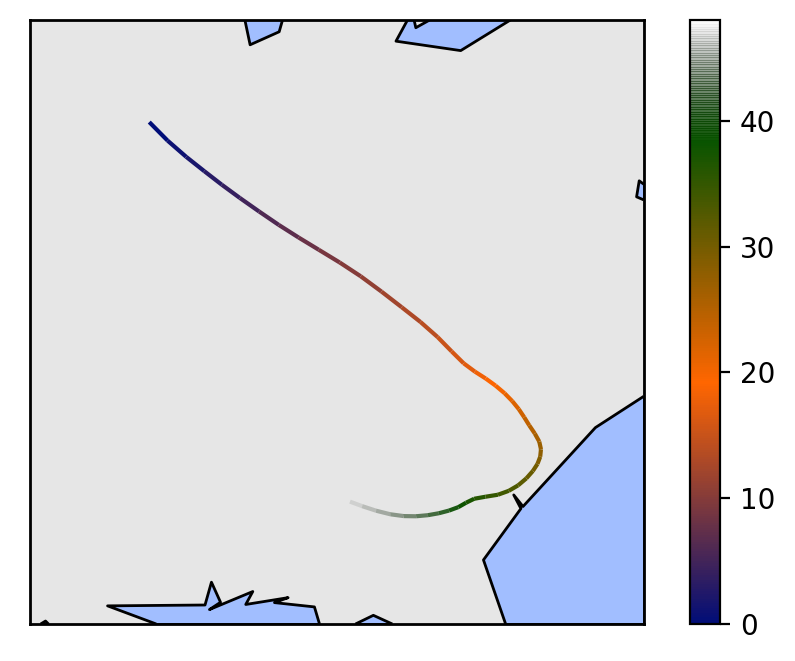

In [97]:
trajout.plot_on_map()

In [ ]:
/mnt/telg/programs/hysplit/working/

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


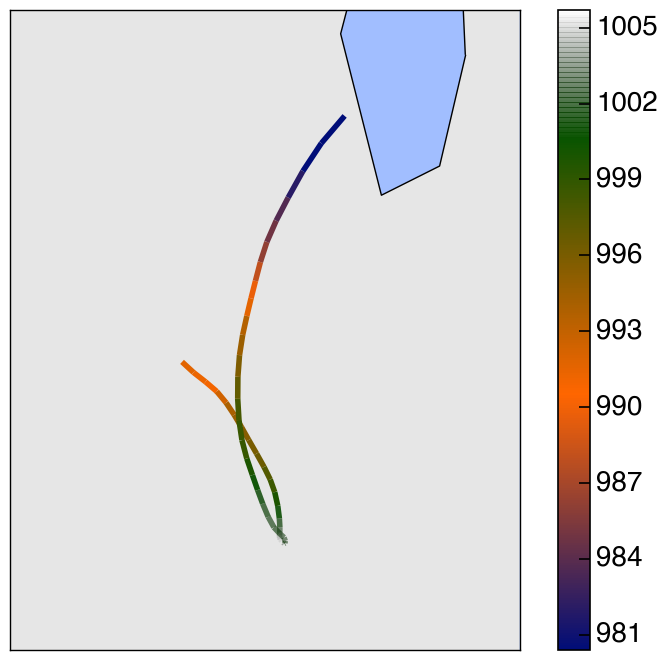

In [6]:
lc = bla.result.plot_on_map(intensity='PRESSURE', lw = 4)

## Land use

In [10]:
from hysplit_py import land_use_map as lum

In [17]:
fname = '/Volumes/HTelg_4TB_Backup/land_use_data/LCType_0p25.nc'
land_use = lum.read_file(fname)

(<matplotlib.figure.Figure at 0x12229c470>,
 <matplotlib.collections.QuadMesh at 0x11967a0f0>)

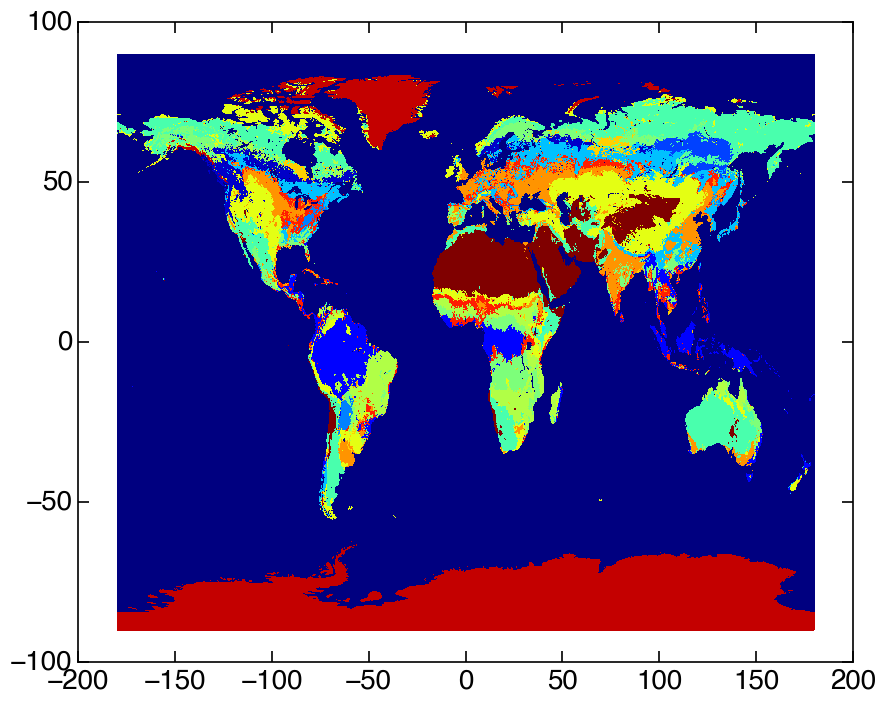

In [18]:
land_use.plot()

In [19]:
land_use.legend

land_use_type  color
0                                Water    NaN
1         Evergreen Needle leaf Forest    NaN
2           Evergreen Broadleaf Forest    NaN
3         Deciduous Needle leaf Forest    NaN
4           Deciduous Broadleaf Forest    NaN
5                        Mixed Forests    NaN
6                    Closed Shrublands    NaN
7                      Open Shrublands    NaN
8                       Woody Savannas    NaN
9                             Savannas    NaN
10                          Grasslands    NaN
11                   Permanent Wetland    NaN
12                           Croplands    NaN
13                  Urban and Built-Up    NaN
14  Cropland/Natural Vegetation Mosaic    NaN
15                        Snow and Ice    NaN
16        Barren or Sparsely Vegetated    NaN

In [21]:
land_use_ds = land_use.down_sample(nrows=10, ncols=10)

(<matplotlib.figure.Figure at 0x1222d5eb8>,
 <matplotlib.collections.QuadMesh at 0x11de43550>)

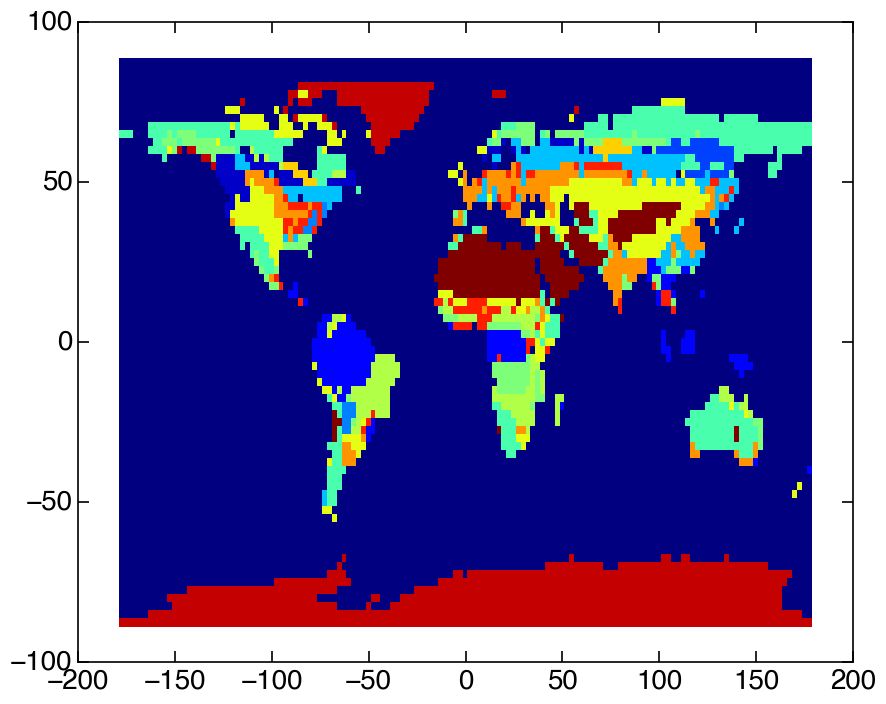

In [22]:
land_use_ds.plot()

# Some tests

## change number of samples

### high

In [3]:
run_high = hysplit_py.Run('concentration')
run_high.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run_high.parameters.meterologic_data_format = 'gdas0p5'

In [19]:
run_high.parameters.number_of_samples = 100000

In [20]:
run_high.parameters

concentration_grids     :  
default
--------
center                                       :  [40.0, -90.0]
output_path                                  :  ./cdump
sampling_interval                            :  [0, 12, 0]
sampling_start_time                          :  2012-01-01 00:00:00
sampling_stop_time                           :  2011-12-31 12:00:00
spacing                                      :  [0.05, 0.05]
span                                         :  [60.0, 120.0]
vertical_concentration_levels_height_of_each :  100
vertical_concentration_levels_number         :  1

input_met_data_folder   :  /Volumes/HTelg_4TB_Backup/hysplit_met_files/
input_met_file_names    :  ['20120101_gdas0p5', '20111231_gdas0p5']
meterologic_data_format :  gdas0p5
num_starting_loc        :  1
number_of_samples       :  100000
output_path             :  ./cdump
pollutants              :  
default
----------
deposition_diffusivity_ratio          :  0.0
deposition_effective_henrys_constant  :  0.0
deposi

In [21]:
run_high.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


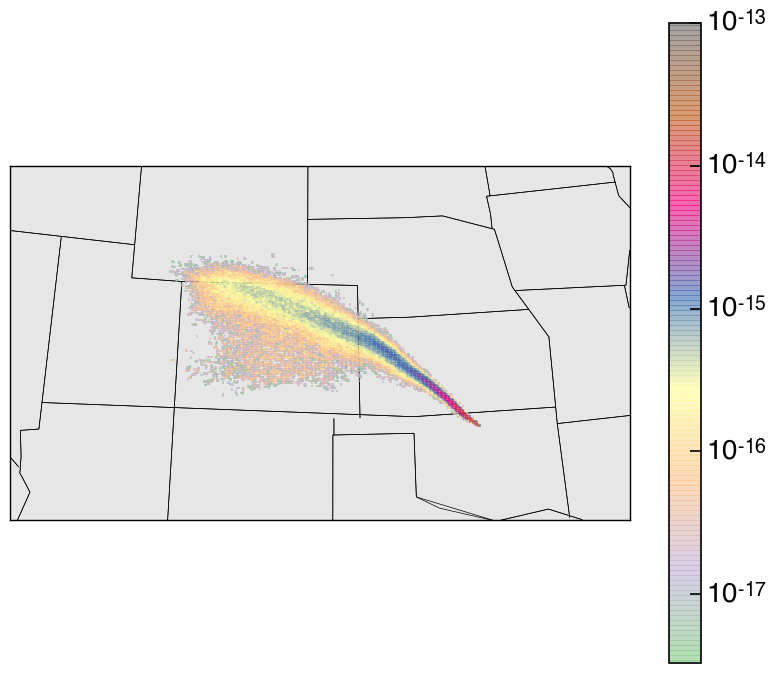

In [22]:
run_high.result.plot()

### low 

In [13]:
run_low = hysplit_py.Run('concentration')
run_low.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run_low.parameters.meterologic_data_format = 'gdas0p5'

In [27]:
run_low.parameters.number_of_samples = `

In [28]:
run_low.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


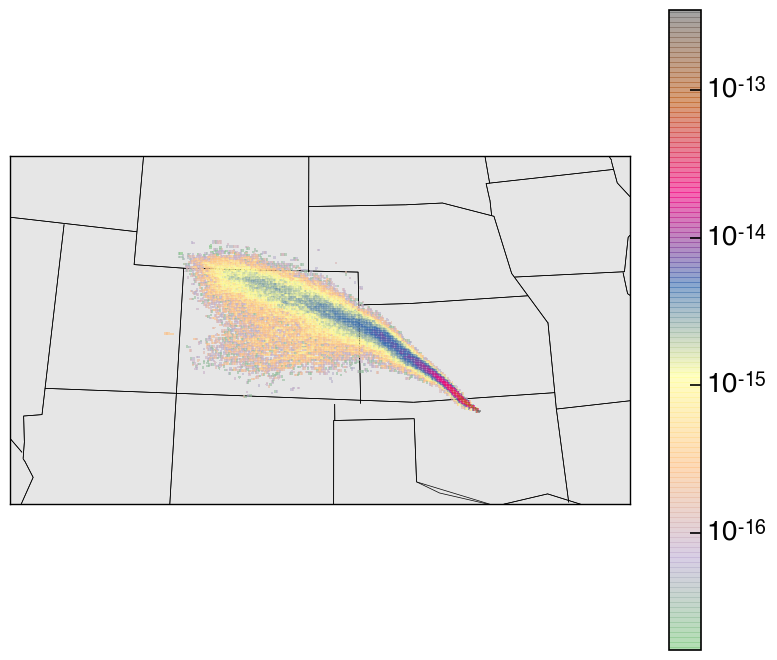

In [29]:
run_low.result.plot()

### both

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


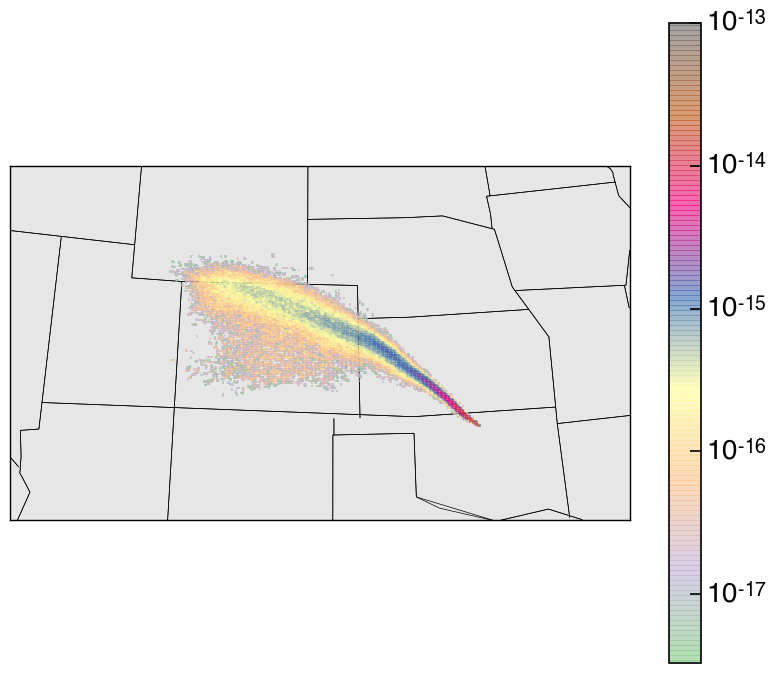

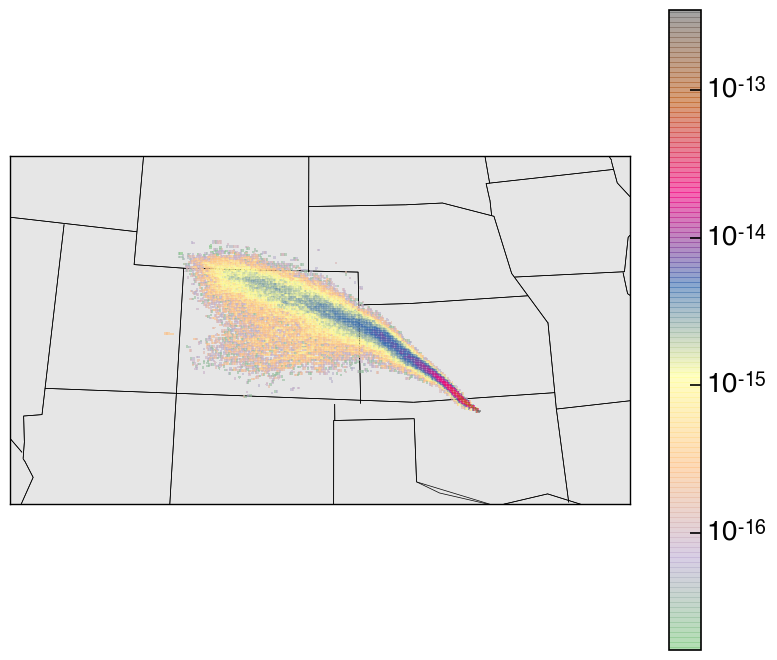

In [30]:
run_high.result.plot()
run_low.result.plot()

##   gdas0.5 to gdas1 comparison

### gdas1

In [1886]:
run1 = hysplit_py.Run('concentration')
run1.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()

In [1887]:
run1.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


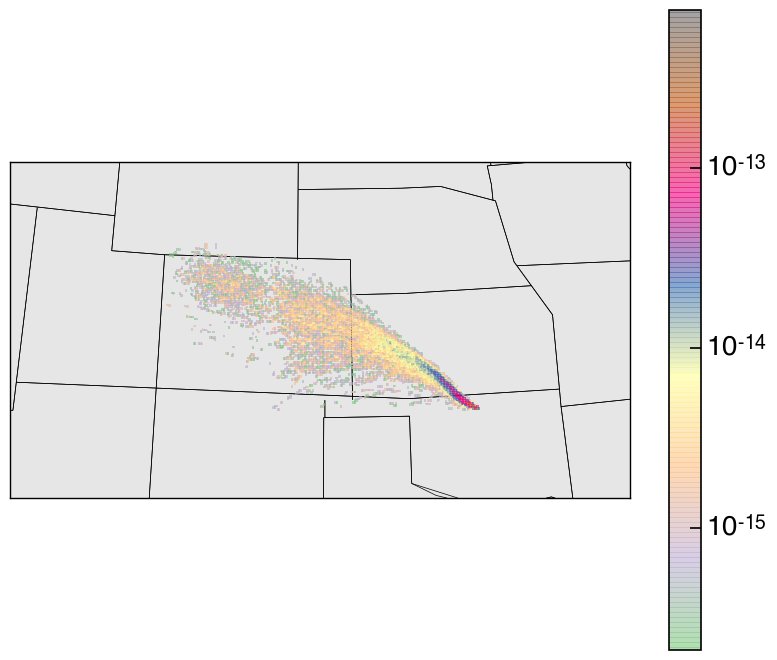

In [1888]:
run1.result.plot()

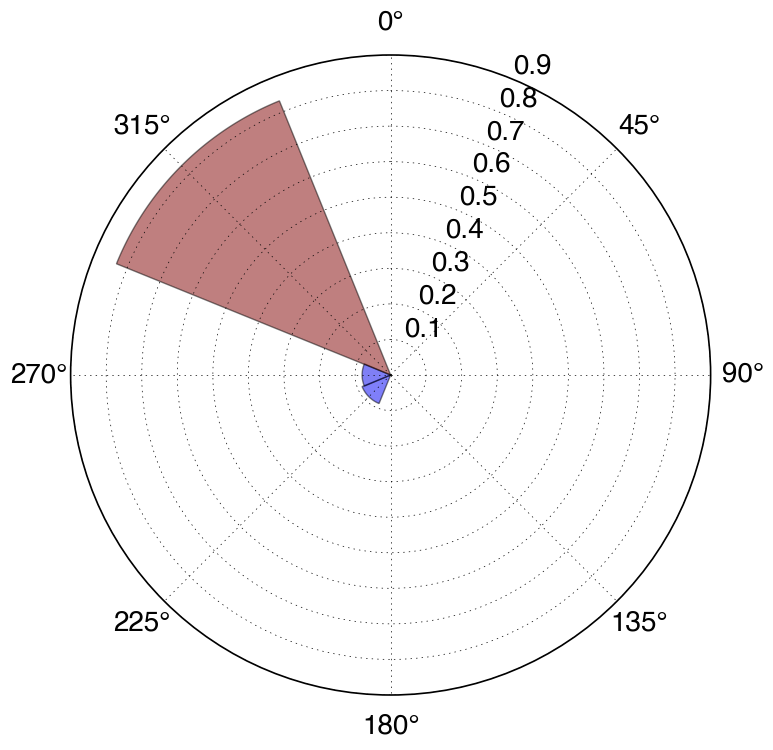

In [1889]:
run1.result.source_attribution_angular().plot()

### gdas0p5

In [1893]:
run0g5 = hysplit_py.Run('concentration')
run0g5.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run0g5.parameters.meterologic_data_format = 'gdas0p5'

In [1896]:
run0g5.download_missing_meterologic_files()

In [1897]:
run0g5.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


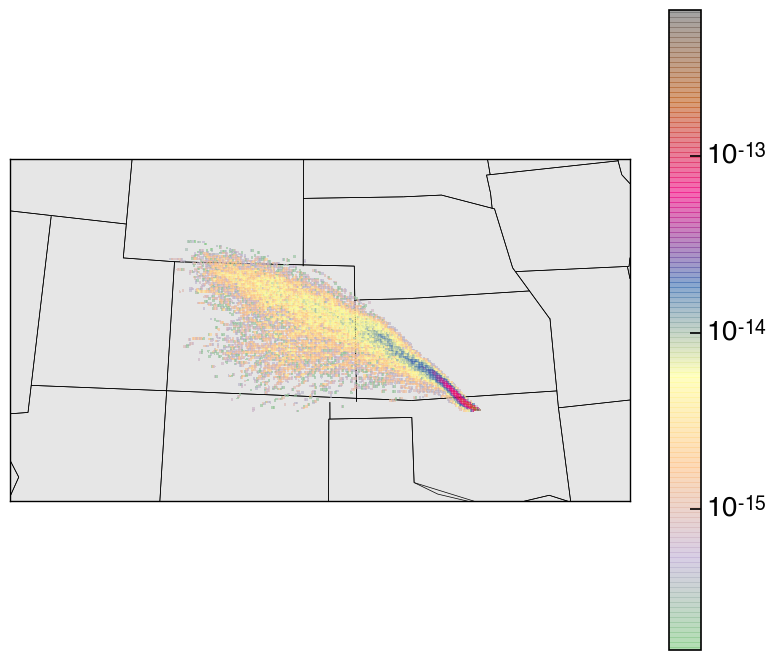

In [1898]:
run0g5.result.plot()

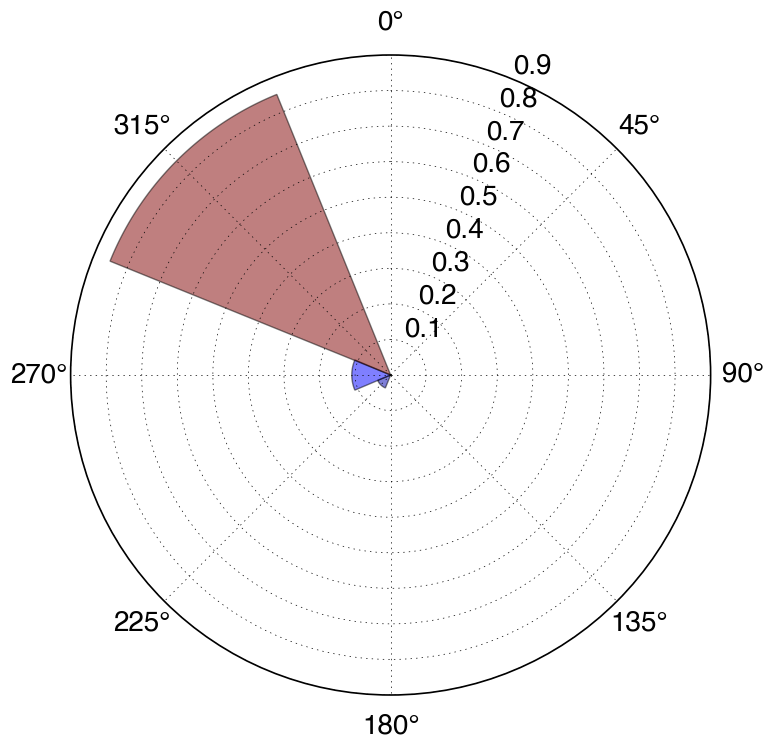

In [1899]:
run0g5.result.source_attribution_angular().plot()

### in comarison 

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


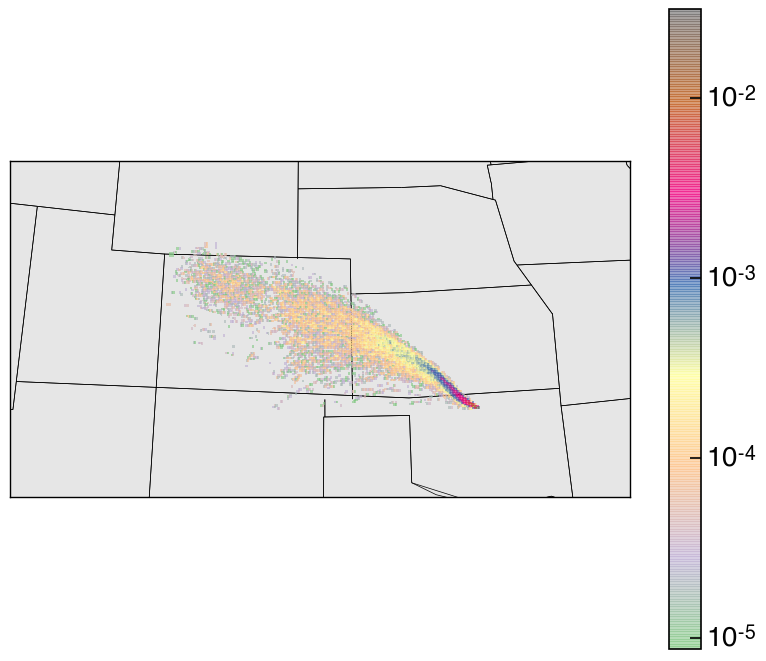

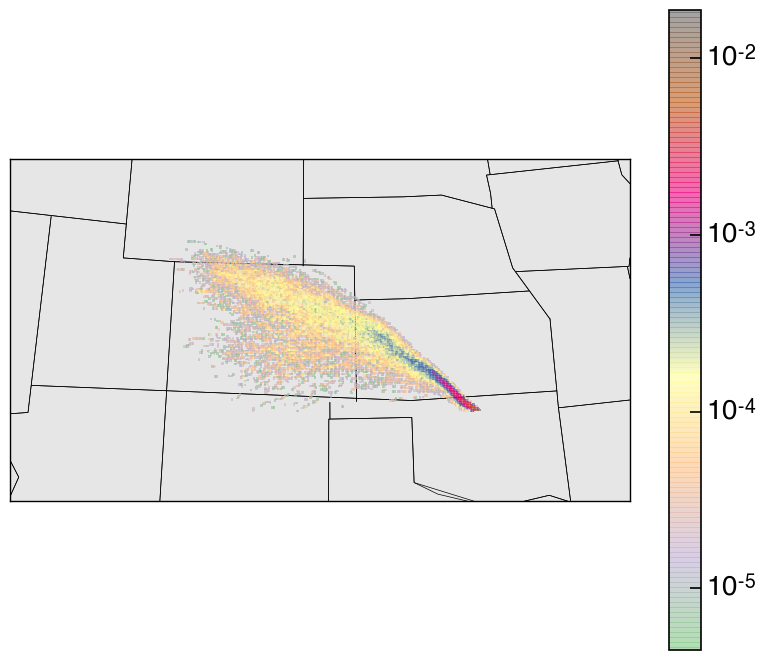

In [1900]:
run1.result.plot()
run0g5.result.plot()

##   gdas0.5 to gdas1 comparison ... long time

### gdas1

In [1914]:
run1 = hysplit_py.Run('concentration')
run1.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run1.parameters.run_time = -168
run1.run_test()

Test result: False
All met files present: False
Met files available:
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.jan12.w1 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.dec11.w5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.dec11.w4 ..... False


(False,
 'Test result: False\nAll met files present: False\nMet files available:\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.jan12.w1 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.dec11.w5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas1/gdas1.dec11.w4 ..... False',
 ['gdas1.dec11.w4'])

In [1915]:
run1.download_missing_meterologic_files()

In [1916]:
run1.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


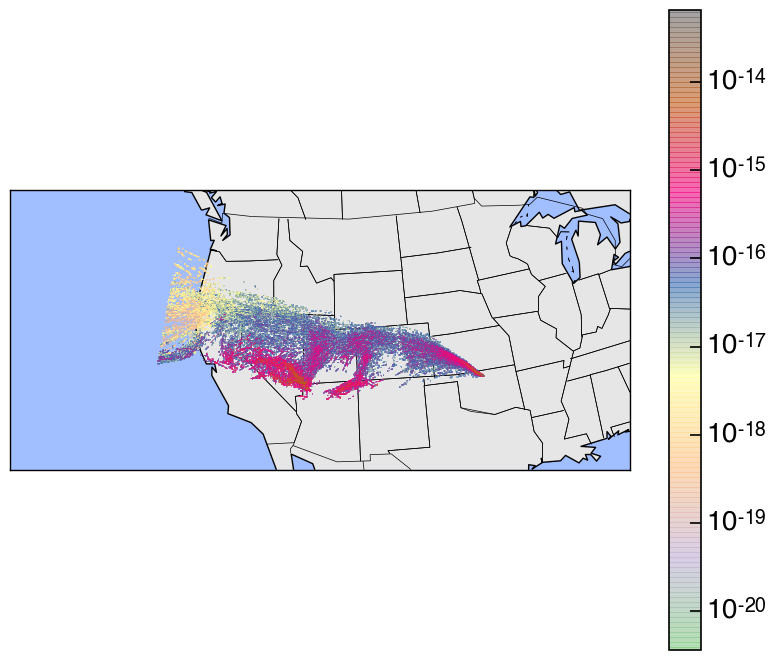

In [1917]:
run1.result.plot()

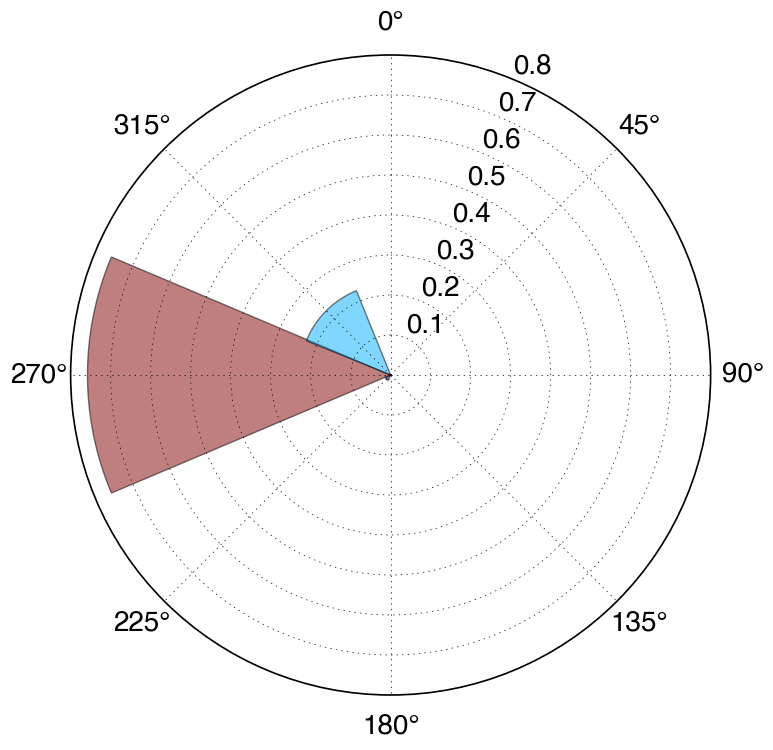

In [1918]:
run1.result.source_attribution_angular().plot()

### gdas0p5

In [1919]:
run0g5 = hysplit_py.Run('concentration')
run0g5.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run0g5.parameters.meterologic_data_format = 'gdas0p5'
run0g5.parameters.run_time = -168
run0g5.run_test()

Test result: False
All met files present: False
Met files available:
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111230_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111229_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111228_gdas0p5 ..... False
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111227_gdas0p5 ..... False
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111226_gdas0p5 ..... False
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111225_gdas0p5 ..... False


(False,
 'Test result: False\nAll met files present: False\nMet files available:\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111230_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111229_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111228_gdas0p5 ..... False\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111227_gdas0p5 ..... False\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111226_gdas0p5 ..... False\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111225_gdas0p5 ..... False',
 ['20111228_gdas0p5',
  '20111227_gdas0p5',
  '20111226_gdas0p5',
  '20111225_gdas0p5'])

In [1920]:
run0g5.download_missing_meterologic_files()

In [1921]:
run0g5.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


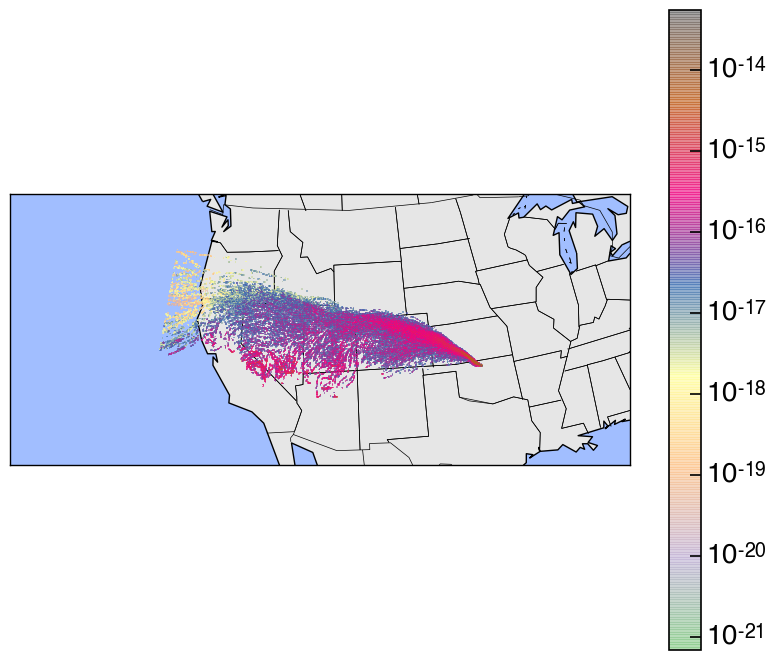

In [1922]:
run0g5.result.plot()

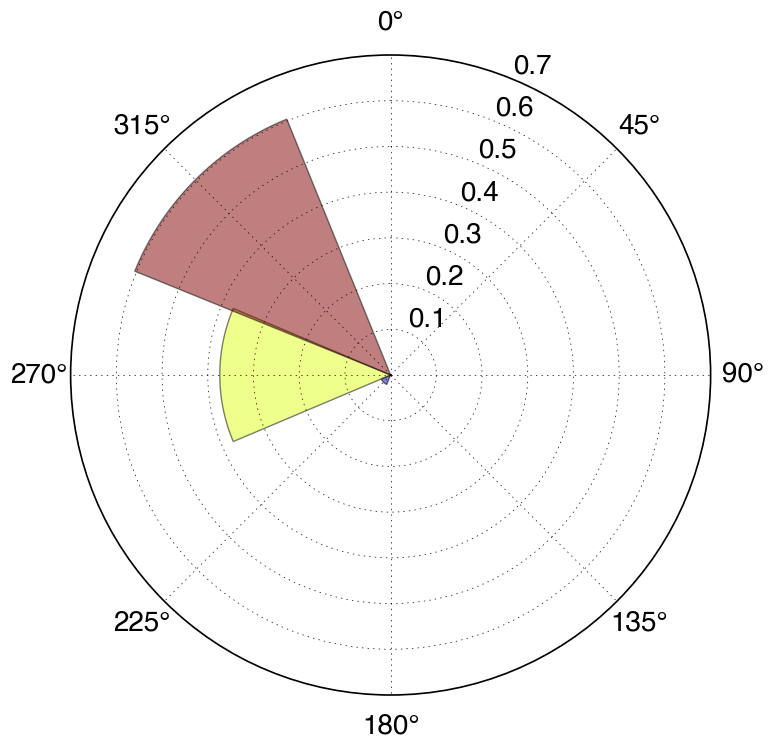

In [1923]:
run0g5.result.source_attribution_angular().plot()

### in comarison 

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


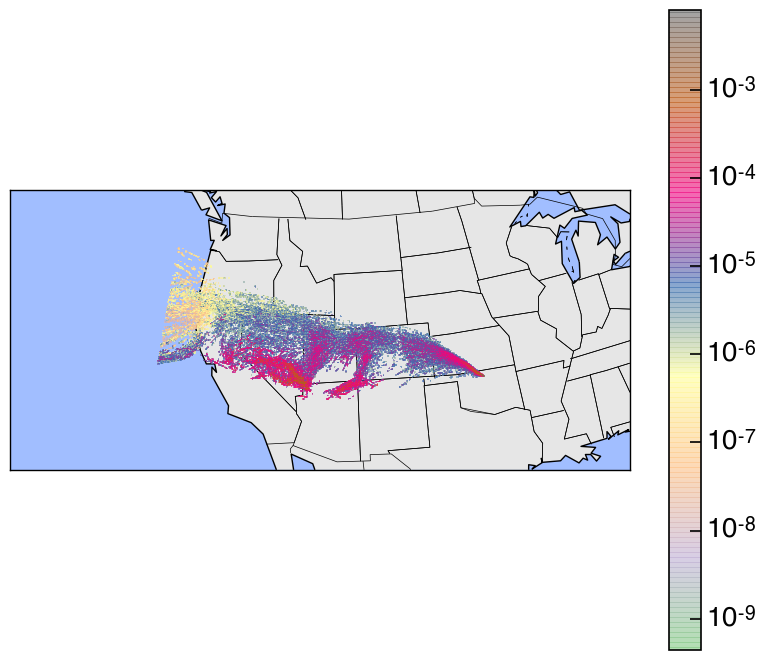

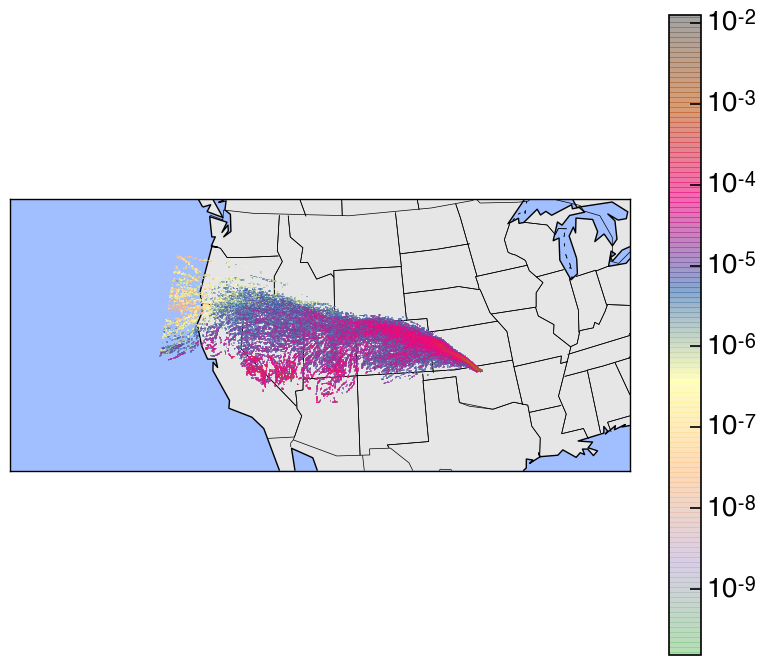

In [1924]:
run1.result.plot()
run0g5.result.plot()

## Altitude dependence

### 10 m

In [1928]:
run10 = hysplit_py.Run('concentration')
run10.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run10.parameters.meterologic_data_format = 'gdas0p5'
run10.parameters.run_time = -12
run10.run_test()

Test result: True
All met files present: True
Met files available:
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True


(True,
 'Test result: True\nAll met files present: True\nMet files available:\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True',
 [])

In [1929]:
run10.download_missing_meterologic_files()

In [1930]:
run10.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


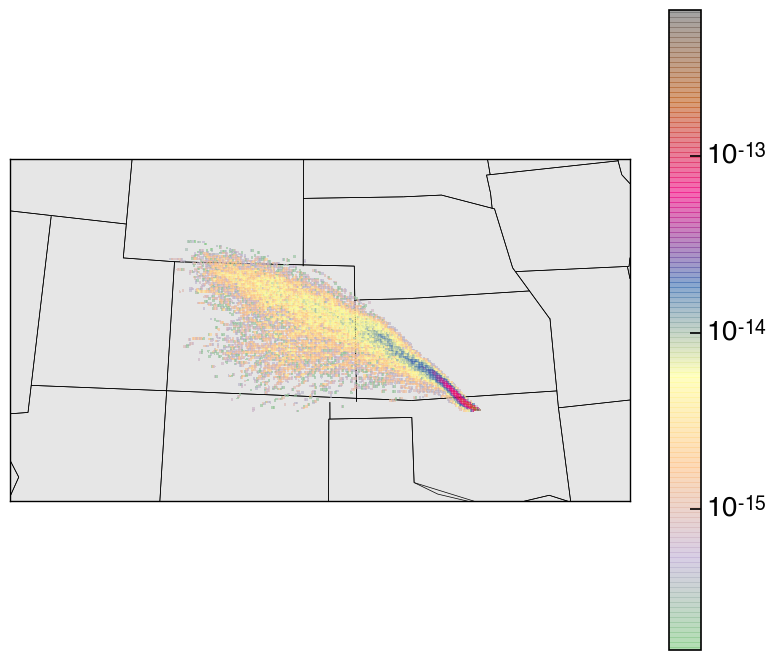

In [1931]:
run10.result.plot()

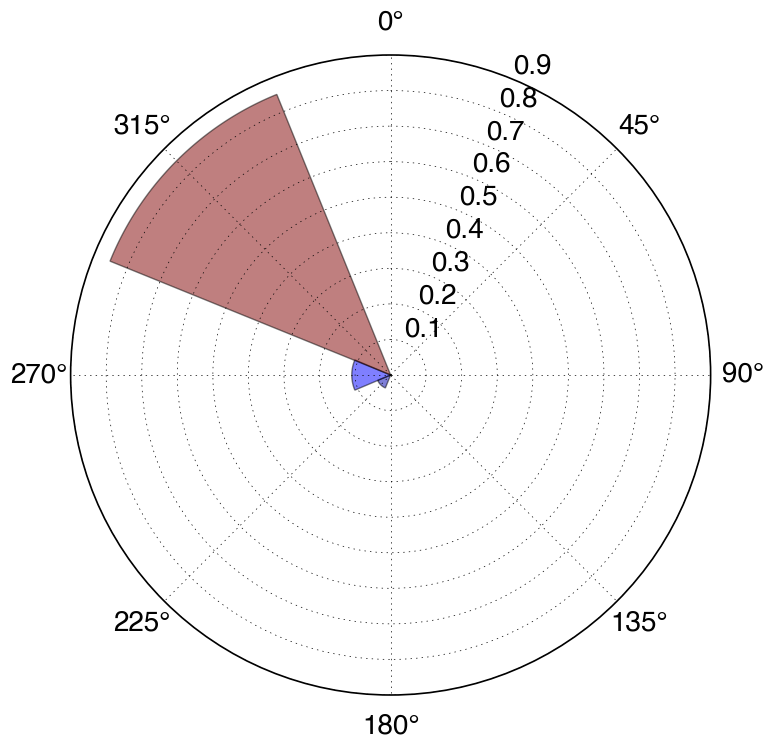

In [1932]:
run10.result.source_attribution_angular().plot()

### 500 m

In [1943]:
run500 = hysplit_py.Run('concentration')
run500.parameters.predefined_scenes.sgp_aerosol_accu_backwards_gdas1()
run500.parameters.meterologic_data_format = 'gdas0p5'
run500.parameters.run_time = -12
run500.parameters.starting_loc = [[36.605, -97.485, 5000.0]]
run500.run_test()

Test result: True
All met files present: True
Met files available:
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True
/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True


(True,
 'Test result: True\nAll met files present: True\nMet files available:\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20120101_gdas0p5 ..... True\n/Volumes/HTelg_4TB_Backup/hysplit_met_files/gdas0p5/20111231_gdas0p5 ..... True',
 [])

In [1944]:
run500.download_missing_meterologic_files()

In [1945]:
run500.run()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1624: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif fill_color == 'none' or fill_color == 'None':


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/colors.py:1022: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


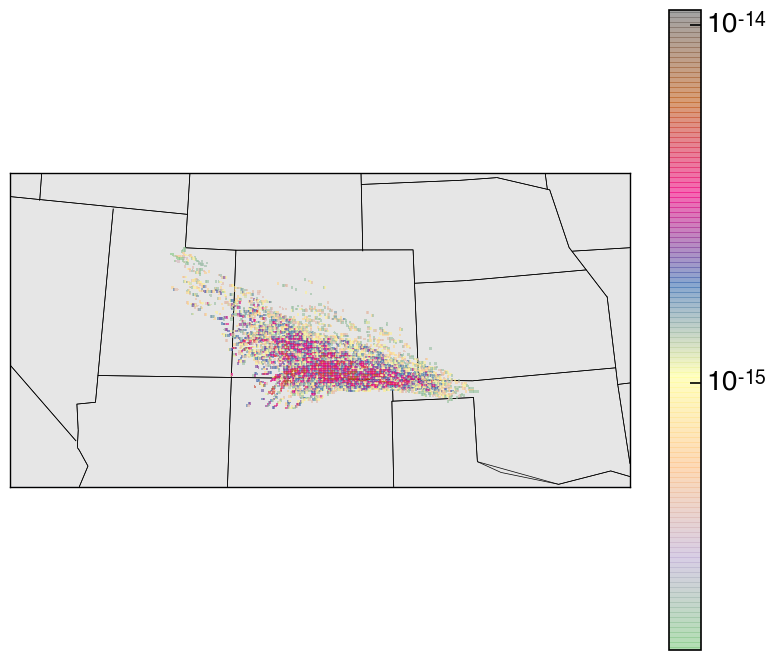

In [1946]:
run500.result.plot()

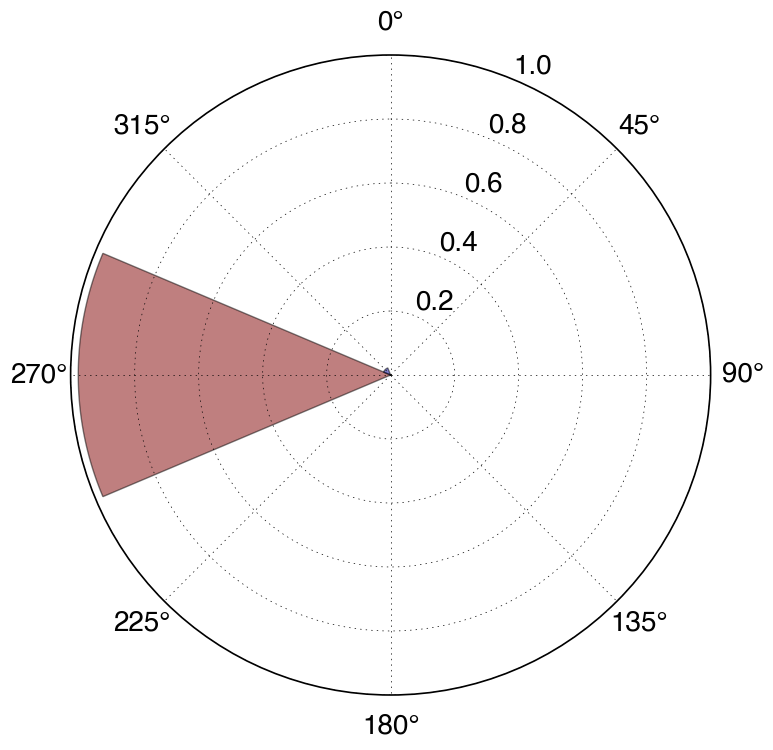

In [1947]:
run500.result.source_attribution_angular().plot()